In [98]:
from haven import haven_jupyter as hj
from haven import haven_results as hr
from haven import haven_utils as hu

# path to where the experiments got saved
savedir_base = '/mnt/public/results/debug/sps'
# savedir_base = '/mnt/public/results/toolkit/sps'
savedir_base = '/mnt/public/results/adaptive_results/SLS++_results_plotting/all_results'
savedir_base = '/mnt/public/results/toolkit/icml'

exp_list = []
for exp_group in [
#     "ae_mixup"
# #     "sanity_check"
#     "adaptive_II_syn",
    "nomom_syn",
#     "nomom_cifar10",
    "nomom_cifar100"
#     "sps_syn",
#      "main_clf"
#     "mnist_clf"
#     "clf_omniglot",
#     "gen_omniglot",
                 ]:
    exp_list += hu.load_py('/mnt/home/projects/optimization-benchmark/exp_configs/icml_rebuttal.py').EXP_GROUPS[exp_group]

# get experiments
rm = hr.ResultManager(
    exp_list=exp_list, 
#     filterby_list=[{'dataset.name':'flowerss'}],
#     exp_ids=['dcd2c19a2db075872bc1ec0f092ad741'],
                      savedir_base=savedir_base, 
                      verbose=0
                     )
# print(len(rm.exp_list))
# stop
# y_metrics = ['d_loss', 'g_loss', 'c_loss']
y_metrics = ['train_loss', 'step_size']
x_metric = 'epoch'
bar_agg = 'max'
mode = 'line'
figsize = (8,5)
figsize = (20,10)

# legend_list = None
legend_format = ''
title_list = ['dataset', 'margin', 'model']
# title_format = '{} - batch size: {}'
# title_format = 'dataset'
title_format = ''
# groupby_list = ['batch_size']
# groupby_list = ['lr']
groupby_list = ['dataset', 'margin', 'model']
# filterby_list = None
# filterby_list = {'dataset':'svhn'}
filterby_list = [{'dataset':'mnist', 'model':{'name':'cgan_mixup','dec_type':'style'}}]
filterby_list = [{'dataset':'mnist', 'model':{'name':'cgan_mixup','dec_type':None}}]
filterby_list = [{'dataset':'svhn', 'model':{'name':'cgan_mixup','dec_type':None}}]
# filterby_list = {'dataset':'omniglot'}
# filterby_list = {'mixup_k':5, 'dataset':'mnist'}
# filterby_list = {'batch_size': 128}
# filterby_list = [{'dataset.name':'omniglot'}]
filterby_list=[
                ({'dataset.name':'emnist_f2gan'}, {'best':{'metric':'val_acc', 'metric_agg':'max'}}),
#                 {'dataset.name':'omniglot_f2gan'},
#     {'dataset.name':'emnist_f2gan'}
                  
              ]
filterby_list = [{'opt.gamma':1}]
filterby_list = [
#     {'opt.momentum':.9},
    {'opt.momentum':.3},
     {'opt.momentum':.49},
    {'opt.momentum':.5},
    {'opt.momentum':0.},  
    {'opt.momentum':None}
]
filterby_list = None
n_images = 10
n_exps = 100
legend_list = ['opt.name', 'opt.c']

hj.get_dashboard(rm, vars(), wide_display=True)

Label(value='Loading Dashboard...', layout=Layout(width='800px'))

<IPython.core.display.Javascript object>

Output()

/mnt/home/projects/optimization-benchmark/results_0.pdf saved


[<Figure size 1008x360 with 2 Axes>]

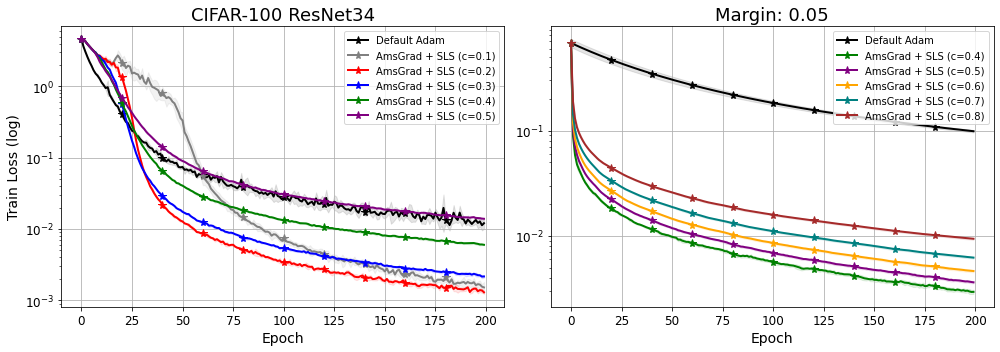

In [100]:
styles = {}
styles['default_adam'] = {'label':'Default Adam', 'color':'black','linewidth':2,  'marker':marker, 
                     'markersize':markersize, 'markevery':markevery }

# styles['ours'] = {'label':f'Default AmsGrad + SLS (c={})', 'linewidth':2,  'marker':marker, 
#                      'markersize':markersize, 'markevery':markevery }

filterby_list =  [
            
            # all
            ({'opt':{'name':'adam', 'lr':1e-3}},
              {'style':styles['default_adam']}), 
            
]

for c, color in zip([.1,.2,.3,0.4, 0.5, 0.6, 0.7, 0.8], ['grey', 'red','blue', 'green','purple','orange', 'teal', 'brown']):
    filterby_list += [
            # ours 1 - sls
            ({'opt': {'name': 'adaptive_first','c':c, 'base_opt':'amsgrad', 'step_size_method':'sls', 
                 'pp_norm_method': 'pp_armijo'}},
              {'style':{'label':f'AmsGrad + SLS (c={c})', 'linewidth':2,  'marker':marker, 
                     'markersize':markersize, 'color':color,'markevery':markevery }}) 
        ]
            
rm = hr.ResultManager(
    exp_list=exp_list, 
    filterby_list=filterby_list,
#     exp_ids=['dcd2c19a2db075872bc1ec0f092ad741'],
                      savedir_base=savedir_base, 
                      verbose=0
                     )
rm.get_plot_all(y_metric_list=['train_loss'], order = 'metrics_by_groups', 
                x_metric='epoch', figsize=(14,5), title_list=['dataset'], 
                legend_list=['opt'], groupby_list=['dataset'], avg_across='runs', legend_fontsize=10,
                map_title_list=[{'synthetic':'Margin: 0.05'}, {'cifar100':'CIFAR-100 ResNet34'}],show_legend_all=True,
                              map_xlabel_list=[{'epoch':'Epoch'}], log_metric_list=['train_loss'],
                              map_ylabel_list=[{'train_loss':'Train Loss'}], legend_kwargs={'loc':'upper right', 'frameon':True}, 
                savedir_plots='/mnt/home/projects/optimization-benchmark/results')

In [11]:

from haven import haven_jupyter as hj
from haven import haven_results as hr
from haven import haven_utils as hu
import pprint

# path to where the experiments are saved
savedir_base = '/mnt/public/results/adaptive_results/SLS++_results_plotting/all_results'
exp_config_fname = '/mnt/home/projects/sls_private/exp_configs/ICLR_21-final-plotting-exp_cofiigs.py'

def form_exp_list(exp_groups, exp_config_fname):
    exp_list = []
    for e in exp_groups:
        exp_list += hu.load_py(exp_config_fname).EXP_GROUPS[e]
    return exp_list

def get_exp_ids(exp_list, standard_filterby_list=None, best_filterby_list=None):    
    # filter based on standard lists
    exp_list_filtered = hr.filter_exp_list(exp_list, filterby_list=standard_filterby_list, verbose=0)

    # start enumerating the IDs to plot. 
    exp_ids = []

    if standard_filterby_list is not None:
        # get the IDs of the standard exps
        for exp_dict in exp_list_filtered:
            exp_id = hu.hash_dict(exp_dict)  
            exp_ids += [exp_id]

    if best_filterby_list is not None:
        # handle the exps for which we need the best configuration
        for filterby_list in best_filterby_list:
            exp_dict = hr.get_best_exp_dict(exp_list, savedir_base, filterby_list=filterby_list,
                                            metric='train_loss', min_or_max='min', return_scores=False, verbose=False)
            if len(exp_dict) == 0:
                continue

            exp_id = hu.hash_dict(exp_dict)
        #         print(exp_id)
        #         stop
            exp_ids += [exp_id]
    return exp_ids

markersize = 8
markevery = 20
linewidth = 1
marker = '*'
styles = {}

styles['best_adagrad'] = {'label':'Best Adagrad','linewidth':linewidth, 'color':'black', 
                     'marker':marker, 'markersize':markersize, 'markevery':markevery }

styles['default_adagrad'] = {'label':'Default Adagrad','linewidth':2, 'color':'black', 
                     'marker':marker, 'markersize':markersize, 'markevery':markevery }
styles['all_adagrad'] = {'label':'Adagrad','linewidth':linewidth, 'color':'gray', 
                     'marker':marker, 'markersize':markersize, 'markevery':markevery,}
styles['all_adam'] = {'label':'Adam', 'color':'gray','linewidth':linewidth,  'marker':marker, 
                     'markersize':markersize, 'markevery':markevery }
styles['all_adam_none'] = {'label':None, 'color':'gray','linewidth':linewidth,  'marker':marker, 
                     'markersize':markersize, 'markevery':markevery }


styles['radam'] = {'label':'Radam', 'color':'steelblue','linewidth':2,  'marker':marker, 
                     'markersize':markersize, 'markevery':markevery }

styles['adabound'] = {'label':'Adabound', 'color':'indigo','linewidth':2,  'marker':marker, 
                     'markersize':markersize, 'markevery':markevery }

styles['adam'] = {'label':'Adam', 'color':'black','linewidth':2,  'marker':marker, 
                     'markersize':markersize, 'markevery':markevery }
styles['default_adam'] = {'label':'Default Adam', 'color':'black','linewidth':2,  'marker':marker, 
                     'markersize':markersize, 'markevery':markevery }



styles['adagrad_lipschitz'] = {'label':'Adagrad + Lipschitz LS',  'color':'blue','marker':marker ,
                         'markersize':15, 'marker':marker,
                           'linewidth': 2,
                     'markevery':markevery }

styles['adagrad_armijo'] = {'label':'Adagrad + Armijo LS',  'color':'orange','marker':marker ,
                         'markersize':15, 'marker':marker,
                           'linewidth': 2,
                     'markevery':markevery }


styles['adagrad_armijo_sls'] = {'label':'Adagrad +  SLS', 'color':'orange',
                                   'marker':marker,'markersize':markersize, 'linewidth': 2,
                             'markersize':15, 
                                    'markevery':markevery }


styles['adagrad_momentum'] = {'label':'Adagrad + SLS + mom', 'color':'magenta',
                                   'marker':marker,'markersize':markersize, 'linewidth': 2,
                             'markersize':15, 
                                    'markevery':markevery }



styles['amsgrad_armijo_sls'] = {'label':'Amsgrad +  SLS (beta = 0)', 'color':'cyan',
                                   'marker':marker,'markersize':markersize, 'linewidth': 2,
                             'markersize':15, 
                                    'markevery':markevery }


styles['amsgrad_momentum'] = {'label':'Amsgrad + SLS', 'color':'blue',
                                   'marker':marker,'markersize':markersize, 'linewidth': 2,
                             'markersize':15, 
                                    'markevery':markevery }


styles['amsgrad_hb'] = {'label':'Amsgrad +  SLS + HB', 'color':'green',
                                   'marker':marker,'markersize':markersize, 'linewidth': 2,
                             'markersize':15, 
                                    'markevery':markevery }

styles['adam_armijo_sps'] = {'label':'Adam +  SPS', 'color':'green',
                                   'marker':marker,'markersize':markersize, 'linewidth': 2,
                             'markersize':15, 
                                    'markevery':markevery }

styles['adam_lipschitz_sls'] = {'label':'Adagrad + Smoothness',  'color':'blue','marker':marker ,
                         'markersize':15, 'marker':marker,
                           'linewidth': 2,
                     'markevery':markevery }

styles['adam_armijo_sls'] = {'label':'Adam + Armijo + SLS', 'color':'orange','marker':'+',
                        'linewidth': 2,
         'markersize':15, 'markevery':markevery }


styles['sls'] ={'label':'SLS', 'color':'red', 'marker':'+', 'linewidth':2,
                'markersize':markersize, 'markevery':markevery }


styles['sps'] = {'label':'SPS', 'color':'brown', 'marker':'+', 'linewidth':2,
                 'markersize':markersize, 'markevery':markevery }

map_exp_list = [


# Adagrad
{'filterby': {'opt':{'name':'adagrad', 'lr':1e-3}, }, 
  'map':{'label':'Adagrad','linewidth':linewidth, 'color':'black', 
         'marker':marker, 'markersize':markersize, 'markevery':markevery }
},  

# Adam Default
{'filterby': {'opt':{'name':'adam', 'betas':[0.9,.99], 'amsgrad':None, 'lr':1e-3}, }, 
  'map':{'label':'Adam', 'color':'orange','linewidth':linewidth,  'marker':marker, 
         'markersize':markersize, 'markevery':markevery }
},              

    
{'filterby': {'opt':{'name':'adam', 'betas':[0,.99], 'amsgrad':None, 'lr':1e-3}, }, 
  'map':{'label':'Adam w/o mom', 'color':'red',  'marker':marker, 'markersize':markersize, 'markevery':markevery }
},              

# AMSGrad Default
{'filterby': {'opt':{'name':'adam', 'betas':[0.9,.99], 'amsgrad':True, 'lr':1e-3}, }, 
  'map':{'label':'Amsgrad', 'color':'grey',  'marker':marker, 'markersize':markersize, 'markevery':markevery }
},    
    
{'filterby': {'opt':{'name':'adam', 'betas':[0.,.99], 'amsgrad':True, 'lr':1e-3}, }, 
  'map':{'label':'Amsgrad w/o momentum', 'color':'black',  'marker':marker, 'markersize':markersize, 'markevery':markevery }
},    
    
# Adagrad Others
{'filterby': {'opt':{'name':'adagrad'}, }, 
  'map':{'label':' Best Adagrad', 'color':'grey', 'linewidth':linewidth,
         'marker':marker, 'markersize':markersize, 'markevery':markevery }
},  

# Adam Others
{'filterby': {'opt':{'name':'adam', 'betas':[0.9,.99], 'amsgrad':None}, }, 
  'map':{'label':' Best Adam', 'color':'grey',  'marker':marker, 'markersize':markersize, 'markevery':markevery }
},          
    
{'filterby': {'opt':{'name':'adam', 'betas':[0.,.99], 'amsgrad':None}, }, 
  'map':{'label':' Best Adam w/o mom', 'color':'black',  'marker':marker, 'markersize':markersize, 'markevery':markevery }
},              

    
# AMSGRAD Others
{'filterby': {'opt':{'name':'adam', 'betas':[0.9,.99], 'amsgrad':True}, }, 
  'map':{'label':' Amsgrad', 'color':'grey',  'marker':marker, 'markersize':markersize, 'markevery':markevery }
}, 
{'filterby': {'opt':{'name':'adam', 'betas':[0.,.99], 'amsgrad':True}, }, 
  'map':{'label':' Amsgrad w/o mom', 'color':'black', 
             'marker':marker, 'markersize':markersize, 'markevery':markevery }
},      
    
# Armijo Adaptive Adagrad
{'filterby': {'opt':{'name':'adaptive_first', 'pp_norm_method':'pp_armijo',
                 'base_opt':'adagrad', 'step_size_method':'sls'}, }, 
  'map':{'label':'Adagrad +  SLS', 'color':'lightseagreen','marker':marker,'markersize':markersize, 
         'markevery':markevery }
},                                  

{'filterby': {'opt':{'name':'adaptive_first',  'pp_norm_method':'pp_armijo',
                      'base_opt':'adagrad', 'step_size_method':'sps' }, }, 
  'map':{'label':'Adagrad + SPS', 'color':'darkgreen', 'marker':marker, 'markersize':markersize, 
         'markevery':markevery}
},   
    
# Lipschitz Adaptive Adagrad
{'filterby': {'opt':{'name':'adaptive_first', 'pp_norm_method':'pp_lipschitz',
                 'base_opt':'adagrad', 'step_size_method':'sls'}, }, 
  'map':{'label':'Adagrad + Smoothness',  'color':'blue','marker':marker ,
             'markersize':markersize, 'marker':marker,
         'markevery':markevery }
},                                  

{'filterby': {'opt':{'name':'adaptive_first',  'pp_norm_method':'pp_lipschitz',
                      'base_opt':'adagrad', 'step_size_method':'sps' }, }, 
  'map':{'label':'Adagrad + Lipschitz + SPS', 'color':'purple', 'marker':'+', 'markersize':markersize, 
                 'markevery':markevery}
},     
    
# Armijo Adaptive

{'filterby': {'opt':{'name':'adaptive_first', 
                 'base_opt':'adam', 'step_size_method':'sls'}, }, 
  'map':{'label':'Adam +  SLS', 'color':'purple','marker':'+',  
         'markersize':markersize, 'markevery':markevery }
},                                  

{'filterby': {'opt':{'name':'adaptive_first',  
                      'base_opt':'adam', 'step_size_method':'sps' }, }, 
  'map':{'label':'Adam + Armijo + SPS', 
             'color':'maroon', 'marker':marker, 'linewidth':linewidth,
         'markersize':markersize, 'markevery':markevery }
},             

{'filterby': {'opt':{'name':'adaptive_first', 
                      'base_opt':'amsgrad', 'step_size_method':'sls'}, }, 
  'map':{'label':'Amsgrad + SLS', 'color':'blue', 'marker':'+', 'markersize':markersize, 'markevery':markevery }
},             

{'filterby': {'opt':{'name':'adaptive_first', 
                      'base_opt':'amsgrad', 'step_size_method':'sps'}, }, 
  'map':{'label':'Amsgrad + Armijo + SPS', 'color':'red', 'marker':'+', 'markersize':markersize, 'markevery':markevery }
},          

    {'filterby': {'opt':{'name':'adaptive_second', 'step_size_method':'sps'}, }, 
  'map':{'label':'GGN + Armijo + SPS', 'color':'pink', 'marker':'+', 'markersize':markersize, 'markevery':markevery }
}, 
    
    {'filterby': {'opt':{'name':'adaptive_second',  'step_size_method':'sls'}, }, 
  'map':{'label':'GGN + Armijo + SLS', 'color':'teal', 'marker':'+', 'markersize':markersize, 'markevery':markevery }
}, 

    {'filterby': {'opt':{'name':'sgd_armijo'} }, 
  'map':{'label':'SLS', 'color':'magenta', 'marker':'+',
         'linewidth':3,
         'markersize':markersize, 'markevery':markevery }
},    

{'filterby': {'opt':{'name':'sps'} }, 
  'map':{'label':'SPS', 'linewidth':3, 'color':'brown',
         'marker':'+', 'markersize':markersize, 'markevery':markevery }
}, 
]

/mnt/home/miniconda3/lib/python3.8/site-packages/haven/haven_results/plots_line.py:333: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
/mnt/home/miniconda3/lib/python3.8/site-packages/haven/haven_results/__init__.py:300: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


/mnt/home/projects/sls_private/plots/syn_amsgrad_0.pdf saved


/mnt/home/miniconda3/lib/python3.8/site-packages/haven/haven_results/plots_line.py:333: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
/mnt/home/miniconda3/lib/python3.8/site-packages/haven/haven_results/__init__.py:300: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


/mnt/home/projects/sls_private/plots/syn_adagrad_0.pdf saved


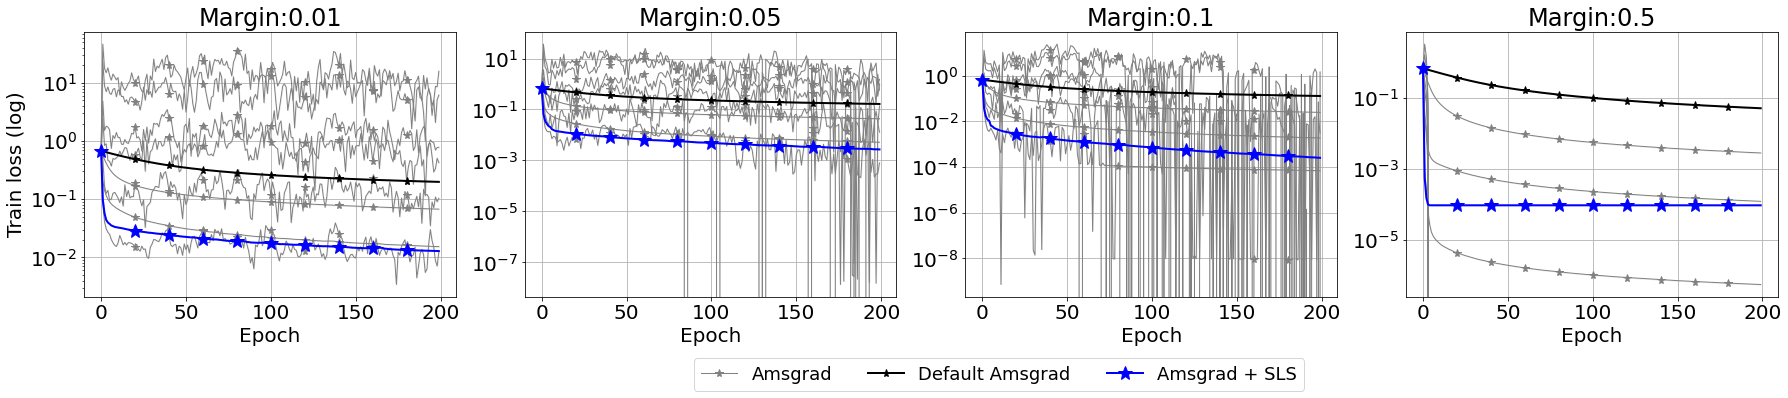

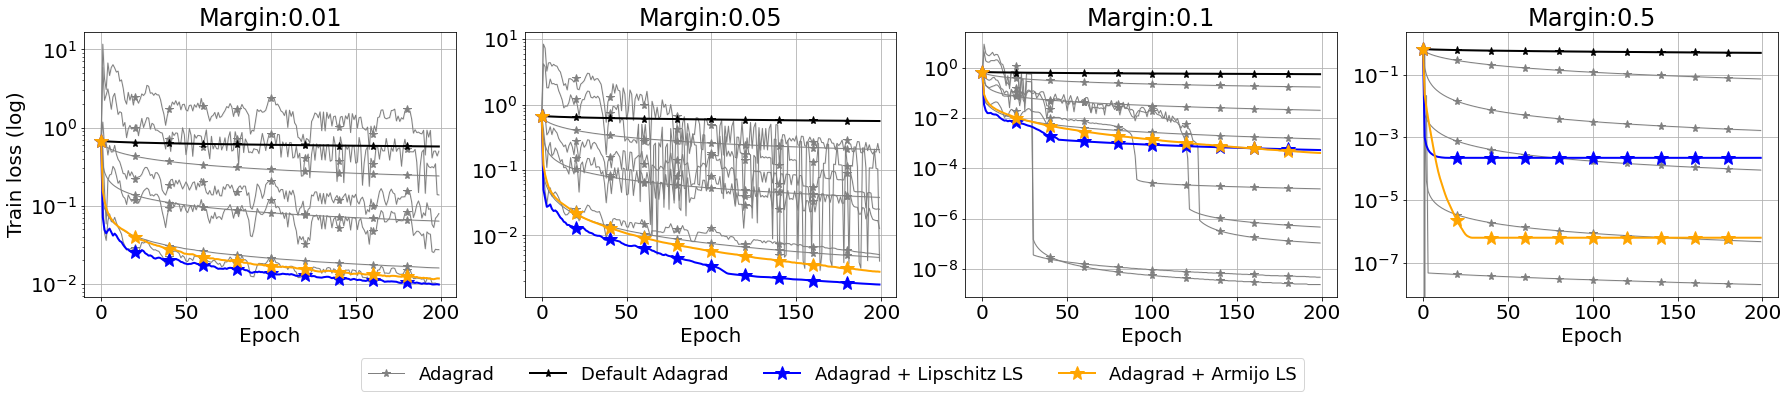

In [13]:
exp_groups = [
            "adaptive_II_syn", 
            "shortlist_mom_syn"
            ]

legend_list = ['opt.name', 'opt.lr', 'opt.c']
y_metric_list = ['train_loss',  'val_acc']
title_list = ['dataset']
groupby_list = ['dataset', 'margin']
log_metric_list = ['train_loss']


for name in [
    'amsgrad', # with the amsgrad option
    'adagrad'
            ]:
    
    
    if name == 'amsgrad':
        
        import copy
        styles_new = copy.deepcopy(styles)
        styles_new['default_adam']['label'] = 'Default Amsgrad'
        styles_new['all_adam']['label'] = 'Amsgrad'
                
        filterby_list = []
        filterby_list +=  [
            
            # default
            ({'opt':{'name':'adam', 'amsgrad':True,'lr':1e-3, 'betas':[0.9,.99]}},
                         {'style':styles_new['default_adam']}), 
            
            # all
            ({'opt':{'name':'adam', 'lr':10, 'amsgrad':True,'betas':[0.9,.99]}},
                        {'style':styles_new['all_adam']}), 
            
            # all
            ({'opt':{'name':'adam', 'amsgrad':True,'betas':[0.9,.99]}},
                        {'style':styles_new['all_adam_none']}), 
            
            # ours 1 - sls
            ({'opt': {'name': 'adaptive_first', 'c':.5,'base_opt':'amsgrad', 'step_size_method':'sls', 
                 'pp_norm_method': 'pp_armijo', 'mom_type':'standard', 'momentum':0.9}},
              {'style':styles['%s_momentum' % name]}) 
        ]
                                  
    else:
        
        filterby_list = []
        filterby_list +=  [

        # default adagrad
        ({'opt':{'name':name, 'lr':1e-3}}, {'style':styles['default_adagrad']}),
                                  
        # all adagrad
        ({'opt':{'name':name, 'lr':10}}, {'style':styles['all_adagrad']}),
            
        ({'opt':{'name':name}}, {'style':styles['all_adam_none']}),
            
        
        # ours lipschitz
        ({'opt': {'name': 'adaptive_first','base_opt':name, 'step_size_method':'sls', 'pp_norm_method': 'pp_lipschitz', 'c':.75, 'reset_option':0}},
           {'style':styles['%s_lipschitz' % name]}),        

        # ours armijo
        ({'opt': {'name': 'adaptive_first', 'mom_type':None, 'momentum':0, 'c':.5,'base_opt':name, 'step_size_method':'sls', 'pp_norm_method': 'pp_armijo', 'reset_option': 1}},
               {'style':styles['%s_armijo' % name]}),             
        ]

    exp_list = form_exp_list(exp_groups, exp_config_fname)
    exp_ids = []

    rm = hr.ResultManager(exp_list=exp_list, 
                          savedir_base=savedir_base, 
                          verbose=0,
                          filterby_list = filterby_list,                  
                          exp_groups=exp_config_fname,
                          score_list_name='score_list.pkl'
                         )
#     # get score df
#     hm_scores_dict = get_hparam_vs_metric_scores(exp_list, filterby_list, groupby_list)
#     hu.save_pkl(f'/mnt/home/projects/fewshot_augment/{name}_lr_vs_loss.pkl', hm_scores_dict)

#     stop
    fig = rm.get_plot_all(
                    order='metrics_by_groups',
                    avg_across='runs',
                    y_metric_list =  ['train_loss'], 
                    x_metric='epoch',
        legend_fontsize=18,
                              x_fontsize=20,
                              y_fontsize=20,
                              xtick_fontsize=20,
                              ytick_fontsize=20,
                              title_fontsize=24,
                    legend_list=legend_list, 
                    title_list = ['margin'], 
                    title_format='Margin:{}',
                    log_metric_list = log_metric_list, 
                    groupby_list = groupby_list,
                    map_ylabel_list=[{'train_loss':'Train loss'}],
        map_xlabel_list=[{'epoch':'Epoch'}],
                    figsize=(25,5),
        plot_confidence=False,
#         legend_kwargs={
#         'bbox_to_anchor':[-.6, -0.25], 
# #                        'borderaxespad':0., 
#                        'ncol':3,'loc':'center'},
#         legend_kwargs={'loc':'best'},
#         if name == 'adagrad':
            legend_kwargs={'bbox_to_anchor':[-0.25, -0.2], 'ncol':4},
#         else:
#         legend_kwargs={'bbox_to_anchor':[-0.25, -0.2], 'ncol':4},
#     bbox_to_anchor=[0.5, 0.5], 
    #            loc='center', ncol=2
        savedir_plots='/mnt/home/projects/sls_private/plots/syn_%s' % (name)
    )

In [14]:
rm.exp_list

[{'dataset': 'synthetic',
  'model': 'logistic',
  'loss_func': 'softmax_loss',
  'opt': {'name': 'adagrad', 'lr': 1000},
  'acc_func': 'softmax_accuracy',
  'margin': 0.05,
  'n_samples': 1000,
  'd': 20,
  'batch_size': 100,
  'max_epoch': 200,
  'runs': 0},
 {'dataset': 'synthetic',
  'model': 'logistic',
  'loss_func': 'softmax_loss',
  'opt': {'name': 'adagrad', 'lr': 1000},
  'acc_func': 'softmax_accuracy',
  'margin': 0.05,
  'n_samples': 1000,
  'd': 20,
  'batch_size': 100,
  'max_epoch': 200,
  'runs': 1},
 {'dataset': 'synthetic',
  'model': 'logistic',
  'loss_func': 'softmax_loss',
  'opt': {'name': 'adagrad', 'lr': 1000},
  'acc_func': 'softmax_accuracy',
  'margin': 0.05,
  'n_samples': 1000,
  'd': 20,
  'batch_size': 100,
  'max_epoch': 200,
  'runs': 2},
 {'dataset': 'synthetic',
  'model': 'logistic',
  'loss_func': 'softmax_loss',
  'opt': {'name': 'adagrad', 'lr': 1000},
  'acc_func': 'softmax_accuracy',
  'margin': 0.05,
  'n_samples': 1000,
  'd': 20,
  'batch_si